## Implementations of Q-iteration and Q-learning

In [1]:
import numpy as np

# This function performs Q_iteration, based on Bellman optimality equation. It's an iterative update of the Q function. The input
# parameters are the discount factor gamma, the number of iterations epochs and the reward matrix R. P corresponds to the 
# probability of having a broken robot, thus staying to the same state with probability P. The function returns the 
# converged Q-function. Convergence is assured by comparison to the previous iteration Q-function.
def Q_iteration(gamma, epochs, R, P=None):
    if P == None:
        P = 0
    Q = np.zeros_like(R)
    Q_next = np.zeros_like(Q)
    
    # iterate for all states and all actions
    for ii in range(epochs):
        for s in range(Q.shape[1]):
            #  if it's a terminal state continue
            if s==0 or s==5:
                    continue
            for a in range(Q.shape[0]):
                # perform the update
                #Q_next[a,s] = R[a,s] + gamma * np.amax([(1-P) * Q[:, 2*a - 1 + s] +  P * Q[:,s]])
                Q_next[a,s] = P*(gamma * np.amax(Q[:,s])) + (1-P) * (R[a,s] + gamma * np.amax(Q[:,2*a - 1 + s]))
        # compare to the value of the previous iteration and break if converged
        # uncomment following line if you want the algorithm to stop when converged
        if np.linalg.norm(Q-Q_next) < 1e-8:
            break
            
        #update the value for the next iteration 
        #print(Q)
        Q = np.array(Q_next, copy = True)
        
    Q = np.array(Q_next, copy = True)
    return(Q)           
    

# The implementation of Q_learning algorithm. The input parameters are the discount factor gamma, the learning rate alpha, the 
# parameter epsilon of greedy research, the number of iterations epochs and the reward matrix R. P corresponds to the 
# probability of having a broken robot, thus staying to the same state with probability P.
def Q_learning(gamma, alpha, epsilon, epochs, R, Q_star, P = None):

    Q_check = np.zeros(epochs)
    std_Q_check = np.zeros_like(Q_check)
    
    if P == None:
        P = 0
    Q = np.zeros_like(R)
    
    n_states = Q.shape[1] - 1
    end_state = False
    
    # iterate for the set number of epochs
    for ii in range(epochs):
        # set an arbitrary initial state. Continue if the initial state is also a terminal state.
        s = np.rint(n_states * np.random.rand()).astype(int)
        if s==0 or s==5:
            Q_check[ii] = Q_check[ii-1] 
            continue
            
        LL = []
        # each episode include a number of steps updating the Q-function until the agent reaches a terminal state, when the
        # running episode ends and we move to the next iteration
        while(not end_state):
            # set current Q function to the value extracted from the previous iteration.
            

            # Apply ε-greedy research. The second condition applies for the case of multiple occurences of the max value.
            # Withoout this condition the first occurence would always be returned, meaning that always the agent would take
            # the action left
            t = np.random.rand()
            #print((Q[:,s] == np.amax(Q[:, s]) * np.ones_like(Q[:,s])).all())
            #print(t, Q[:,s])
            if t<epsilon or (Q[:,s] == np.amax(Q[:, s]) * np.ones_like(Q[:,s])).all():
                a = np.rint(np.random.rand()).astype(int)
            else:
                a = np.argmax(Q[:,s])
                
            LL.append(np.linalg.norm(Q-Q_star))
        
            # Determine the next state based on action a. Then update the Q function.
            # If we get a reward for ending up in a terminal state set end_state to true and continue with the next epoch
            s_next = 2*a - 1 + s
            #Q[a,s] =  Q[a,s] + alpha * (R[a,s] + gamma * np.amax([(1-P)*Q[:,s_next] + P*Q[:, s]]) - Q[a,s])
            #Q[a,s] =  Q[a,s] + alpha * (P* gamma * np.amax(Q[:, s]) + (1-P) *(R[a,s] +  np.amax(Q[:,s_next])) - Q[a,s])
            
            p = np.random.rand()
            if p<P:
                Q[a,s] = Q[a,s] + alpha * (gamma * np.amax(Q[:,s]) - Q[a,s])
            else:
                Q[a,s] = Q[a,s] + alpha * (R[a,s] + gamma*np.amax(Q[:,s_next]) - Q[a,s])
                if R[a,s]>0:
                    end_state = True
                s = s_next
            
        end_state = False
        
        LL.append(np.linalg.norm(Q_star - Q))
        Q_check[ii] = np.mean(np.array(LL, copy = True))
        std_Q_check[ii] = np.std(np.array(LL, copy = True))
        
                                       
    #Q_check[c,:,:] = np.array(Q, copy = True)
    #print(Q)

    return Q_check, std_Q_check

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0.]]
[[0.         0.82352941 0.39295746 0.49867698 1.21107266 0.        ]
 [0.         0.36788113 0.69814777 1.69550173 4.11764706 0.        ]]
0.2061280584177061
0.09940156914173714
0.05900164831078525
0.23501822874369427
0.2139421433166966
0.011453235950317775
0.2098285188924135
0.07032695509517273
0.10084804349751186
0.21028967134237353
0.13708975055237227
0.18890755211206856
0.07046443464037089
0.07981042341231182
0.05476001808851705
0.03902550620212475
0.16735671504406102
0.2372197477601592
0.2624874457986476
0.03726063557354986
0.1286664084796012
0.2131386471025789
0.08884269599039785
0.17013746761388648
0.04570445343455121
0.2739617576446023
0.02225131766893207
0.013062600194292284
0.1035578451836755
0.09527536285219329
0.0022491842454521738
0.29849347022347616
0.2373885889786258
0.2537658480184437
0.2565582424089581
0.1851689836807512
0.03923937393476917
0.0933971302770562
0.16117243587980645
0.21104205001125131
0.22876156505239487
0.036316

0.13229230190952768
0.03726059125813119
0.03281704448926137
0.11437107782742306
0.24113107306171344
0.14174811088700967
0.26891580511713853
0.02908026206893266
0.06346748457626228
0.15405191051525868
0.10469908156426166
0.10212390744549549
0.04372560281715565
0.06086407560764717
0.2722918623979734
0.2449967891463377
0.2023892531422694
0.11200437469687918
0.03555701122095423
0.15036573709093926
0.15106925066289856
0.032894469068521004
0.0625525180069888
0.11785723607891774
0.0391300877975973
0.19394053455535154
0.15287169424289382
0.2308407040351993
0.06386401467736347
0.023037298744886137
0.09868915421794322
0.025825060841839775
0.03442512033061251
0.20235979373010315
0.24807868810114375
0.14005588380910683
0.2426819334001442
0.22159377890213905
0.2770406225061184
0.029246189717512583
0.041965149366841925
0.10605534801891947
0.061044510956510534
0.22295383741018504
0.24596559177816912
0.2361174168695639
0.14620994012808264
[[0.         0.84057265 0.3540435  0.14299212 0.         0.    

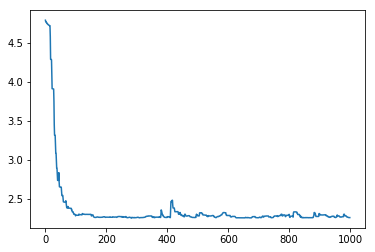

In [50]:
epochs =1000
gamma = 0.5
alpha = 0.1
epsilon =0
print(R)
QQ = Q_iteration(gamma, epochs, R, 0.3)
print(QQ)
QQQ, _ = Q_learning(gamma, alpha, epsilon, epochs, R, QQ, 0.3)
plt.figure()
plt.plot(np.arange(epochs), QQQ)

In [2]:
epochs = 1000
gamma = 0.5

Q = np.zeros((2,6))
R = np.zeros_like(Q)
R[0,1] = 1
R[1,4] = 5

QQ = Q_iteration(gamma, 1000, R, 0)
print(np.round(QQ, 6))

[[0.    1.    0.5   0.625 1.25  0.   ]
 [0.    0.625 1.25  2.5   5.    0.   ]]


In [28]:
QQ = Q_learning(gamma, 0.1,  0, 500, R, 0)
print(QQ)

[[0.         1.         0.5        0.62499999 1.2499999  0.        ]
 [0.         0.62499991 1.24999999 2.49999999 4.99999999 0.        ]]
(array([0.        , 0.02      , 0.23663398, 0.55569206, 0.96126712,
       0.98444033, 1.19003591, 1.38774964, 1.41205788, 1.41205788,
       1.51105345, 1.93583509, 2.09699859, 2.12633163, 2.28436017,
       2.42929455, 2.44007111, 2.44007111, 2.49112313, 2.79758337,
       2.79758337, 3.04354987, 3.27194868, 3.27194868, 3.33062046,
       3.33062046, 3.56459163, 3.76779938, 3.84390478, 3.86886782,
       3.86886782, 4.00665991, 4.03185622, 4.03185622, 4.03185622,
       4.04757622, 4.09708241, 4.24253866, 4.24253866, 4.35521496,
       4.40890708, 4.51391486, 4.62924399, 4.69158552, 4.69158552,
       4.73136348, 4.81277754, 4.81277754, 4.8512557 , 4.8512557 ,
       4.8512557 , 4.86706633, 4.89079054, 4.92492396, 4.97575628,
       5.01420977, 5.09190554, 5.12702642, 5.12702642, 5.17954452,
       5.21679741, 5.25512801, 5.30107692, 5.30107692, 5

## Visualizations 

In [85]:
from matplotlib import pyplot as plt
import pandas as pd

def SARSA_alpha(Q_star, gamma, alpha, epsilon, epochs, rep, R, P):
    
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for a in alpha:
        L2diff = np.zeros((rep, epochs))
        for i in range(rep):
            _, L2diff[i,:], _ = SARSA(gamma, a, epsilon, epochs, R, Q_star, P)

        mean_L2diff = np.mean(L2diff, axis = 0)
        std_L2diff = np.std(L2diff, axis = 0)

        plt.fill_between(aa, mean_L2diff - std_L2diff,
                             mean_L2diff + std_L2diff, alpha=0.1)
        plt.plot(aa, mean_L2diff)
    
    plt.title('L2-norm difference between SARSA and groudtruth')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("L2-norm difference")
    plt.grid()
    plt.legend(['a=1', 'a=0.5', 'a=0.1', 'a=0.01'], loc="best")
    
    
def SARSA_epsilon(Q_star, gamma, alpha, epsilon, epochs, rep, R, P):
    
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for e in epsilon:
        L2diff = np.zeros((rep, epochs))
        for i in range(rep):
            _, L2diff[i,:], _ = SARSA(gamma, alpha, e, epochs, R, Q_star, P)

        mean_L2diff = np.mean(L2diff, axis = 0)
        std_L2diff = np.std(L2diff, axis = 0)

        plt.fill_between(aa, mean_L2diff - std_L2diff,
                             mean_L2diff + std_L2diff, alpha=0.1)
        plt.plot(aa, mean_L2diff)
    
    plt.title('L2-norm difference between SARSA and groundtruth')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("L2-norm difference")
    plt.grid()
    plt.legend(['e=0', 'e=0.1', 'e=0.5', 'e=0.9', 'e=1'], loc="best")

def divQlearn_alpha(Q_star, gamma, alpha, epsilon, epochs, rep, R, P):
    
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for a in alpha:
        L2diff = np.zeros((rep, epochs))
        for i in range(rep):
            L2diff[i,:], _ = Q_learning(gamma, a, epsilon, epochs, R, Q_star, P)

        mean_L2diff = np.mean(L2diff, axis = 0)
        std_L2diff = np.std(L2diff, axis = 0)

        plt.fill_between(aa, mean_L2diff - std_L2diff,
                             mean_L2diff + std_L2diff, alpha=0.1)
        plt.plot(aa, mean_L2diff)
    
    plt.title('L2-norm difference berween Q-learning and groundtruth')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("L2-norm difference")
    plt.grid()
    plt.legend(['a=1', 'a=0.5', 'a=0.1', 'a=0.01'], loc="best")
    
    
def divQlearn_epsilon(Q_star, gamma, alpha, epsilon, epochs, rep, R, P):
    
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for e in epsilon:
        L2diff = np.zeros((rep, epochs))
        for i in range(rep):
            L2diff[i,:], _ = Q_learning(gamma, alpha, e, epochs, R, Q_star, P)

        mean_L2diff = np.mean(L2diff, axis = 0)
        std_L2diff = np.std(L2diff, axis = 0)

        plt.fill_between(aa, mean_L2diff - std_L2diff,
                             mean_L2diff + std_L2diff, alpha=0.1)
        plt.plot(aa, mean_L2diff)
    
    plt.title('L2-norm difference berween Q-learning and groundtruth')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("L2-norm difference")
    plt.grid()
    plt.legend(['e=0', 'e=0.1', 'e=0.5', 'e=0.9', 'e=1'], loc="best")
    
def divQRBF_alpha(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma):
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for a in alpha:
        L2diff = np.zeros((rep, epochs))
        for i in range(rep):
            _, L2diff[i,:], _ = Q_learning_RBF(epochs, a, gamma, epsilon, Q_star, mean_g, sigma_g, c_i, sigma) 
            
        mean_L2diff = np.mean(L2diff, axis = 0)
        std_L2diff = np.std(L2diff, axis = 0)

        plt.fill_between(aa, mean_L2diff - std_L2diff,
                             mean_L2diff + std_L2diff, alpha=0.1)
        plt.plot(aa, mean_L2diff)
    
    plt.title('L2-norm difference berween Q-learning and groundtruth - fixed epsilon')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("L2-norm difference")
    plt.grid()
    plt.legend(['a=1', 'a=0.5', 'a=0.1', 'a=0.01'], loc="best")
    
def divQRBF_epsilon(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma):
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for e in epsilon:
        L2diff = np.zeros((rep, epochs))
        for i in range(rep):
            _, L2diff[i,:], _ = Q_learning_RBF(epochs, alpha, gamma, e, Q_star, mean_g, sigma_g, c_i, sigma) 
            
        mean_L2diff = np.mean(L2diff, axis = 0)
        std_L2diff = np.std(L2diff, axis = 0)

        plt.fill_between(aa, mean_L2diff - std_L2diff,
                             mean_L2diff + std_L2diff, alpha=0.1)
        plt.plot(aa, mean_L2diff)
    
    plt.title('L2-norm difference between Q-learning and groundtruth - fixed alpha')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("L2-norm difference")
    plt.grid()
    plt.legend(['e=0', 'e=0.1', 'e=0.5', 'e=0.9', 'e=1'], loc="best")
    
def divQRBF_ra(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma):
    smoothing_window = 10
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for a in alpha:
        accR = np.zeros((rep, epochs))
        for i in range(rep):
            _, _, accR[i,:] = Q_learning_RBF(epochs, a, gamma, epsilon, Q_star, mean_g, sigma_g, c_i, sigma) 
            
        mean_accR = np.mean(accR, axis = 0)
        std_accR = np.std(accR, axis = 0)
        #mean_accR = pd.Series(mean_accR).rolling(smoothing_window, min_periods=smoothing_window).mean()
        plt.fill_between(aa, mean_accR - std_accR,
                             mean_accR + std_accR, alpha=0.1)
        plt.plot(aa, mean_accR)
    
    plt.title('Cumulative reward vs number of epochs')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("Cumulative Reward")
    plt.grid()
    plt.legend(['a=1', 'a=0.5', 'a=0.1'], loc="best")
    
def divQRBF_stepa(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma):
    smoothing_window = 10
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for a in alpha:
        steps = np.zeros((rep, epochs))
        for i in range(rep):
            _, steps[i,:], _ = Q_learning_RBF(epochs, a, gamma, epsilon, Q_star, mean_g, sigma_g, c_i, sigma) 
            
        mean_steps = np.mean(steps, axis = 0)
        std_steps = np.std(steps, axis = 0)
        #mean_steps = pd.Series(mean_steps).rolling(smoothing_window, min_periods=smoothing_window).mean()

        plt.fill_between(aa, mean_steps - std_steps,
                             mean_steps + std_steps, alpha=0.1)
        plt.plot(aa, mean_steps)
    
    plt.title('Mean number of steps per episode vs number of epochs')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("Mean number of steps")
    plt.grid()
    plt.legend(['a=1', 'a=0.5', 'a=0.1'], loc="best")
    
def divQRBF_re(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma):
    smoothing_window = 10
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for e in epsilon:
        accR = np.zeros((rep, epochs))
        for i in range(rep):
            _, _, accR[i,:] = Q_learning_RBF(epochs, alpha, gamma, e, Q_star, mean_g, sigma_g, c_i, sigma) 
            
        mean_accR = np.mean(accR, axis = 0)
        std_accR = np.std(accR, axis = 0)
        #mean_accR = pd.Series(mean_accR).rolling(smoothing_window, min_periods=smoothing_window).mean()

        plt.fill_between(aa, mean_accR - std_accR,
                             mean_accR + std_accR, alpha=0.1)
        plt.plot(aa, mean_accR)
    
    plt.title('Cumulative reward vs number of epochs')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("Cumulative Reward")
    plt.grid()
    plt.legend(['e=0', 'e=0.1', 'e=0.5', 'e=1'], loc="best")
    
def divQRBF_stepe(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma):
    smoothing_window = 10
    fig = plt.figure(figsize = (10,5))
    aa = np.arange(epochs)
    for e in epsilon:
        steps = np.zeros((rep, epochs))
        for i in range(rep):
            _, steps[i,:], _ = Q_learning_RBF(epochs, alpha, gamma, e, Q_star, mean_g, sigma_g, c_i, sigma) 
            
        mean_steps = np.mean(steps, axis = 0)
        std_steps = np.std(steps, axis = 0)
        #mean_steps = pd.Series(mean_steps).rolling(smoothing_window, min_periods=smoothing_window).mean()
        
        plt.fill_between(aa, mean_steps - std_steps,
                             mean_steps + std_steps, alpha=0.1)
        plt.plot(aa, mean_steps)
    
    plt.title('Mean number of steps per episode vs number of epochs')
    plt.xlabel("Number of interactions - epochs")
    plt.ylabel("Mean number of steps")
    plt.grid()
    plt.legend(['e=0', 'e=0.1', 'e=0.5', 'e=1'], loc="best")

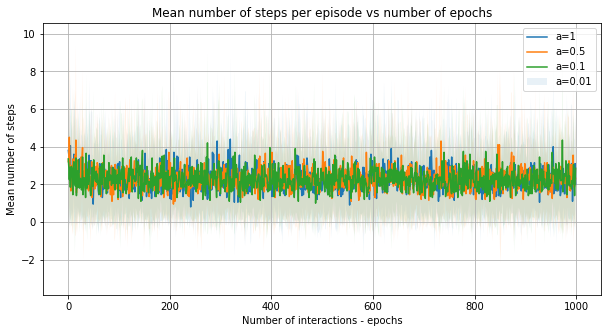

In [21]:
epochs = 1000

gamma = 0.5
alpha = [1, 0.5, 0.1]
epsilon = 0.5
rep = 20
mean_g=0
sigma_g=0.1

sigma = 0.6
c_i = np.arange(6)

Q_star = Q_iteration(gamma, epochs, R)
divQRBF_stepa(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

### L2 diff vs epochs - fixed epsilon

[[0.    1.    0.5   0.625 1.25  0.   ]
 [0.    0.625 1.25  2.5   5.    0.   ]]


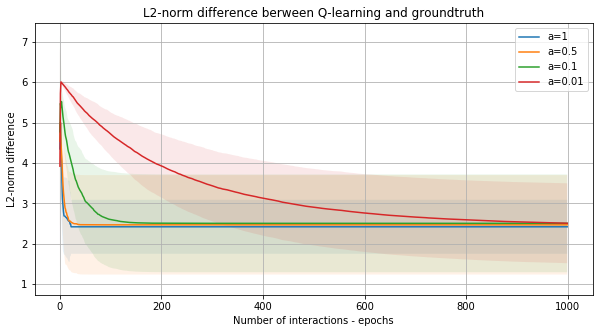

In [71]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
print(Q_star)

Q = np.zeros((2,6))
R = np.zeros_like(Q)
R[0,1] = 1
R[1,4] = 5


gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0
rep = 20

divQlearn_alpha(Q_star, gamma, alpha, epsilon, epochs, rep, R, 0)

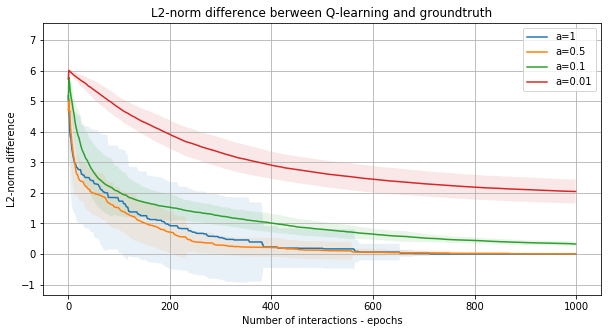

In [72]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.1
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

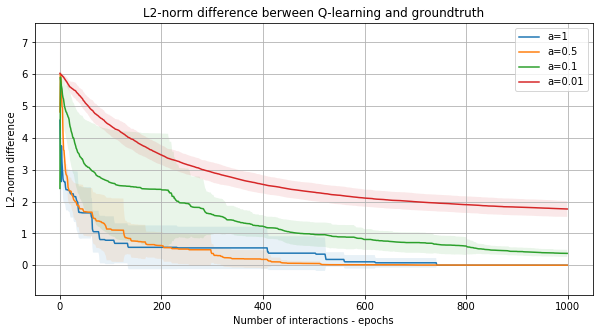

In [65]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.2
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

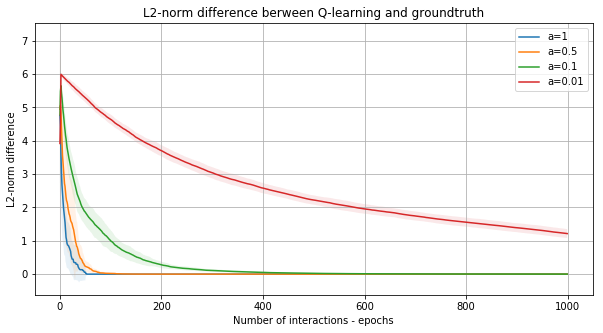

In [73]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.5
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

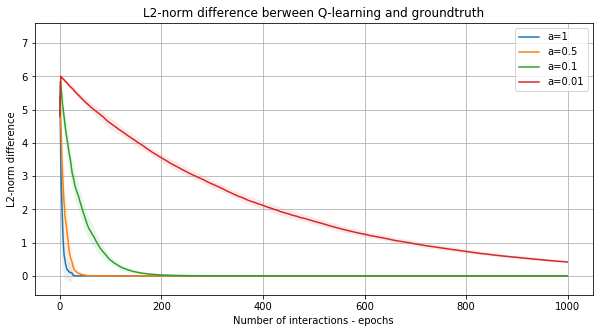

In [74]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.9
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

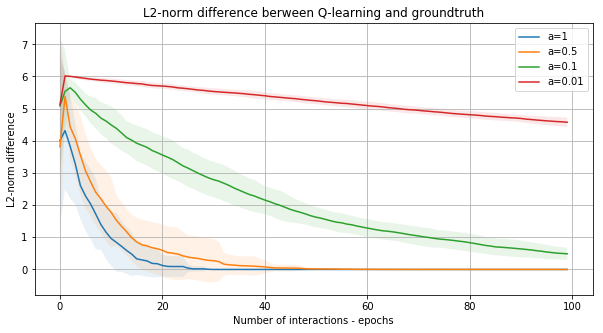

In [75]:
epochs = 100
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.9
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

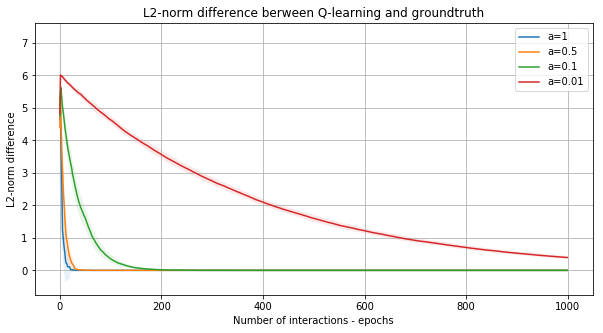

In [76]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 1
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

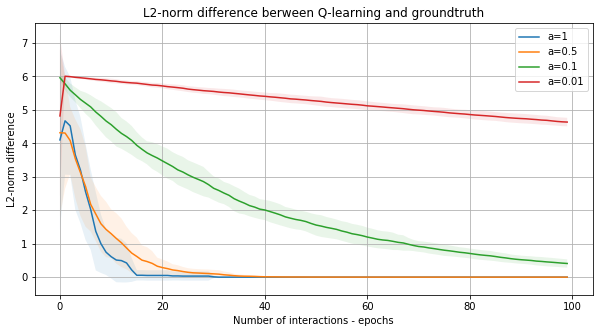

In [77]:
epochs = 100
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 1
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

### L2 diff vs epochs - fixed alpha

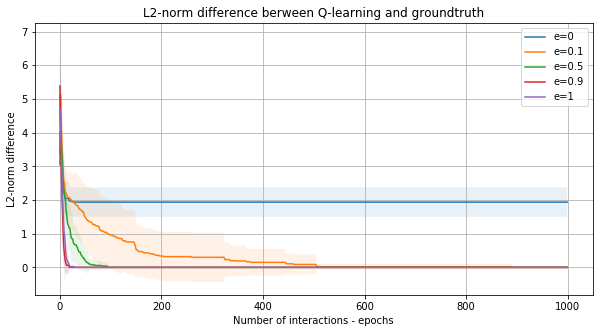

In [86]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 1
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

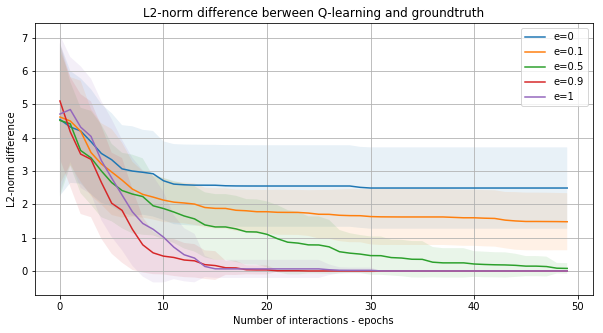

In [91]:
epochs = 50
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 1
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

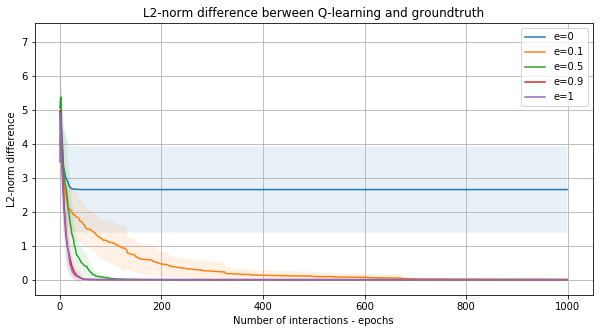

In [87]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 0.5
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

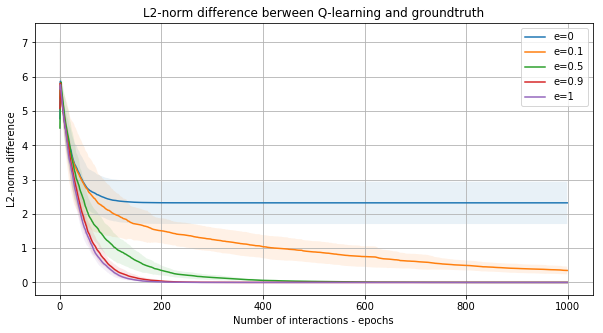

In [88]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 0.1
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

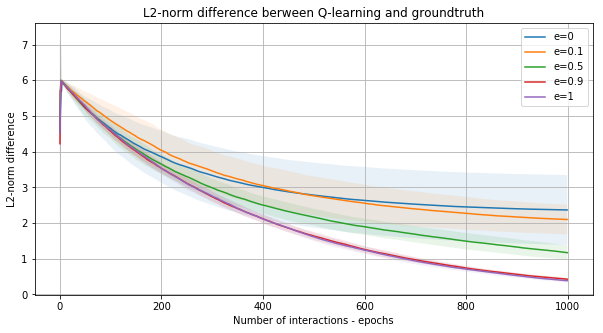

In [89]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 0.01
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

### Stochastic transitions

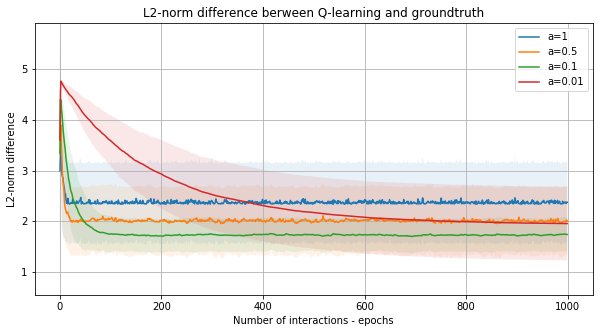

In [39]:
epochs = 1000
Q_star= Q_iteration(gamma, epochs, R, P=0.3)
Q = np.zeros((2,6))
R = np.zeros_like(Q)
R[0,1] = 1
R[1,4] = 5


gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0
rep = 20

divQlearn_alpha(Q_star, gamma, alpha, epsilon, epochs, rep, R, 0.3)

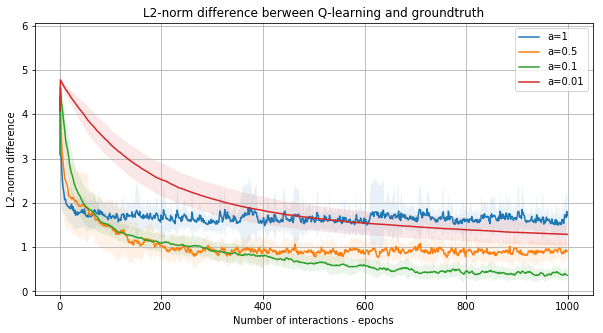

In [40]:
epochs = 1000

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.1
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

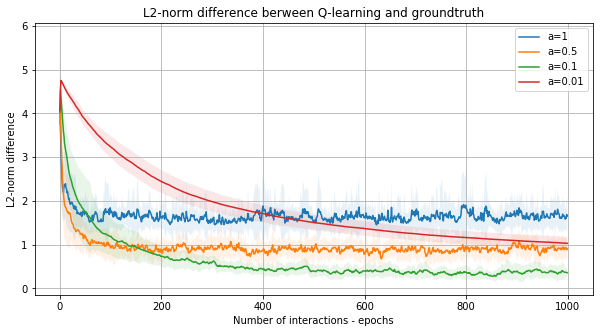

In [41]:
epochs = 1000

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.2
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

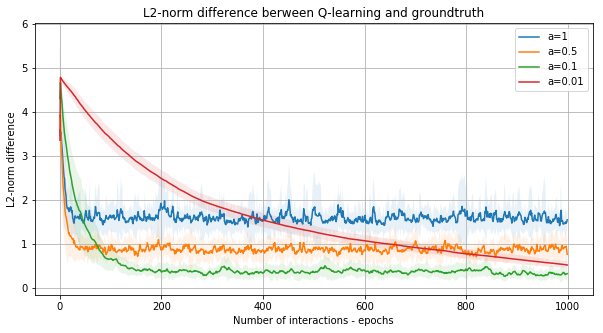

In [42]:
epochs = 1000


gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.5
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

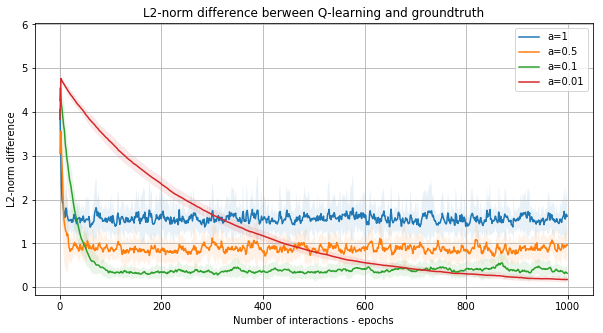

In [43]:
epochs = 1000


gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.9
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

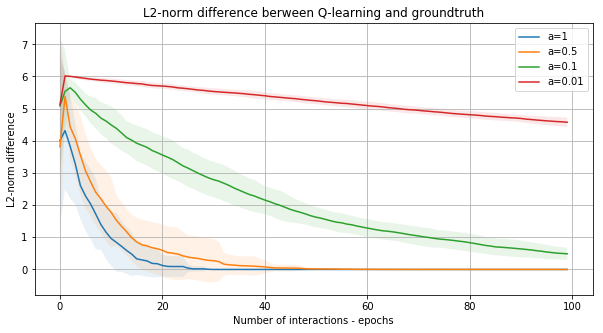

In [75]:
epochs = 100

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.9
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

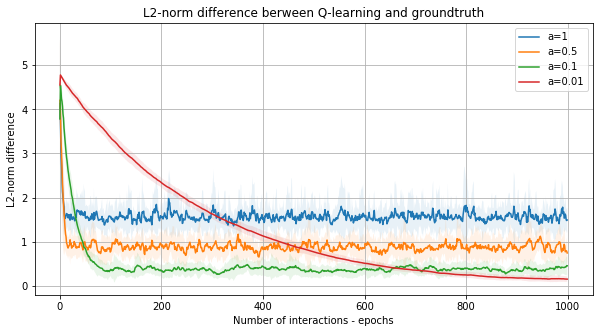

In [44]:
epochs = 1000


gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 1
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

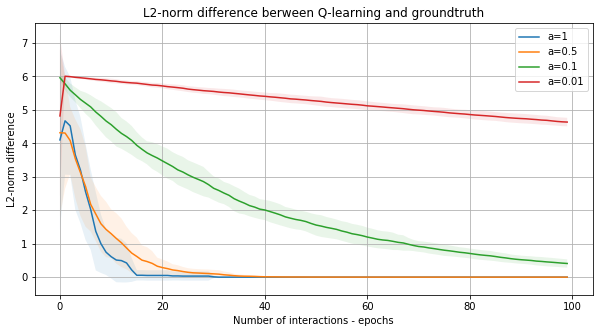

In [77]:
epochs = 100

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 1
rep = 20

divQlearn_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

### L2 diff vs epochs - fixed alpha

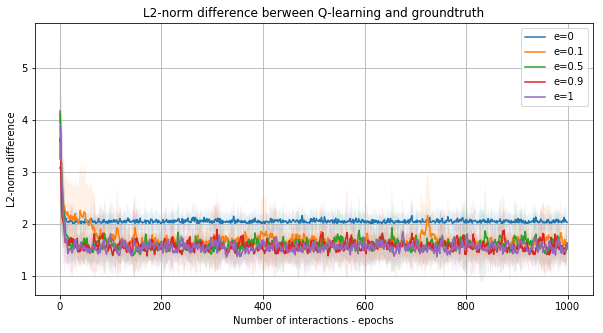

In [45]:
epochs = 1000


gamma = 0.5
alpha = 1
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

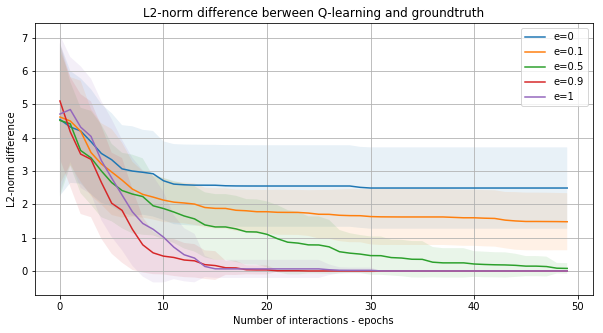

In [91]:
epochs = 50


gamma = 0.5
alpha = 1
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

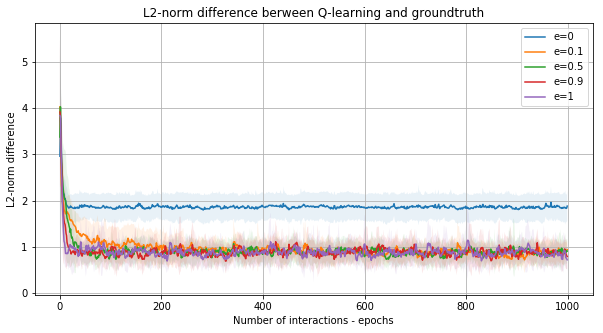

In [46]:
epochs = 1000


gamma = 0.5
alpha = 0.5
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

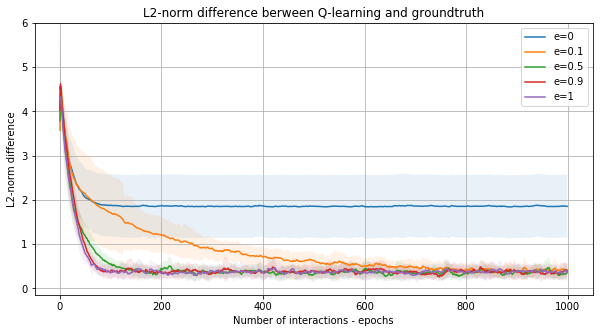

In [47]:
epochs = 1000


gamma = 0.5
alpha = 0.1
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

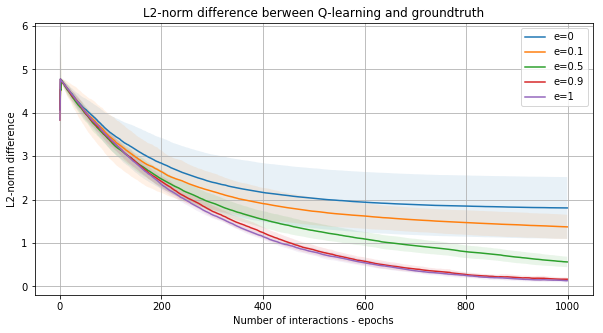

In [48]:
epochs = 1000


gamma = 0.5
alpha = 0.01
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

divQlearn_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0.3)

## Continuous state

[[0.    1.    0.5   0.625 1.25  0.   ]
 [0.    0.625 1.25  2.5   5.    0.   ]]


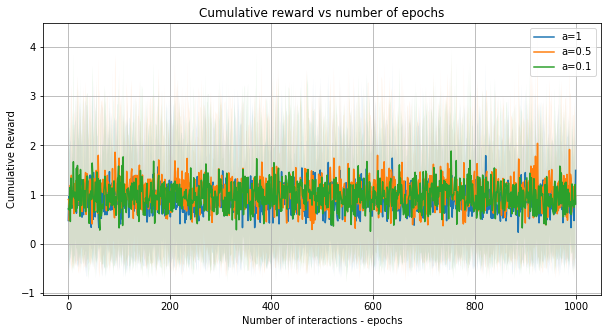

In [71]:
epochs = 1000

gamma = 0.5
alpha = [1, 0.5, 0.1]
epsilon = 0
rep = 20
mean_g=0
sigma_g=0.1

sigma = 0.7
c_i = np.arange(6)

Q_star = Q_iteration(gamma, epochs, R)
print(Q_star)

divQRBF_ra(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

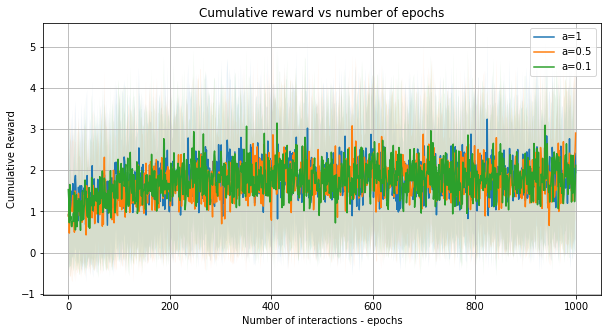

In [72]:
epochs = 1000

gamma = 0.5
alpha = [1, 0.5, 0.1]
epsilon = 0.1
rep = 20

divQRBF_ra(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

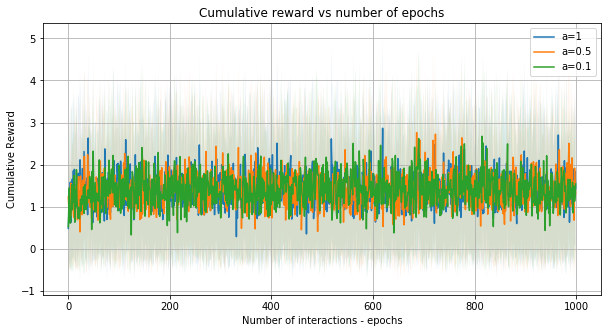

In [73]:
epochs = 1000

gamma = 0.5
alpha = [1, 0.5, 0.1]
epsilon = 0.5
rep = 20

divQRBF_ra(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

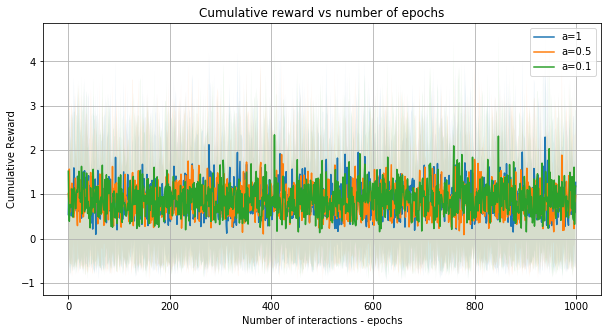

In [74]:
epochs = 1000


gamma = 0.5
alpha = [1, 0.5, 0.1]
epsilon = 1
rep = 20

divQRBF_ra(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

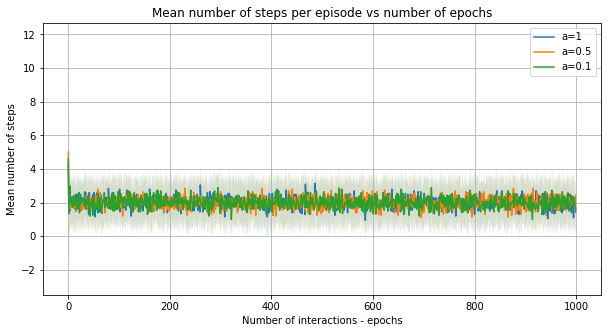

In [75]:

alpha = [1, 0.5, 0.1]
epsilon = 0
divQRBF_stepa(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

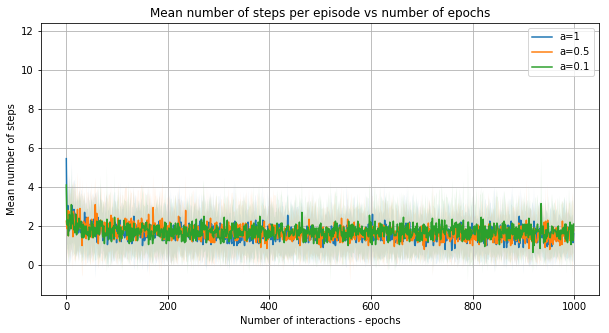

In [76]:
epochs = 1000

gamma = 0.5
alpha = [1, 0.5, 0.1]
epsilon = 0.1
rep = 20

divQRBF_stepa(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

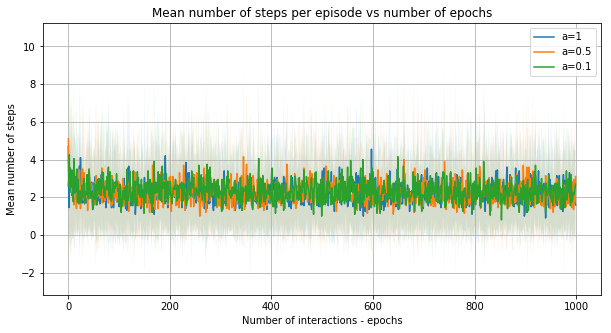

In [77]:
epochs = 1000

gamma = 0.5
alpha = [1, 0.5, 0.1]
epsilon = 0.5
rep = 20

divQRBF_stepa(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

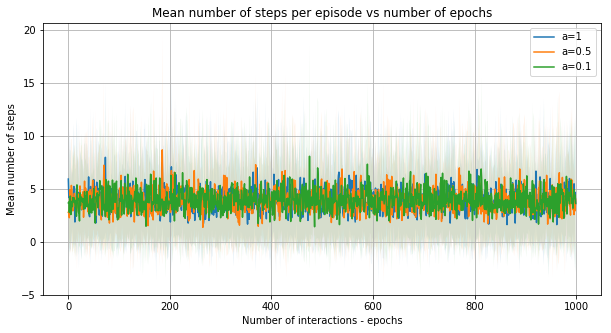

In [78]:
epochs = 1000


gamma = 0.5
alpha = [1, 0.5, 0.1]
epsilon = 1
rep = 20

divQRBF_stepa(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

### L2 diff vs epochs - fixed alpha

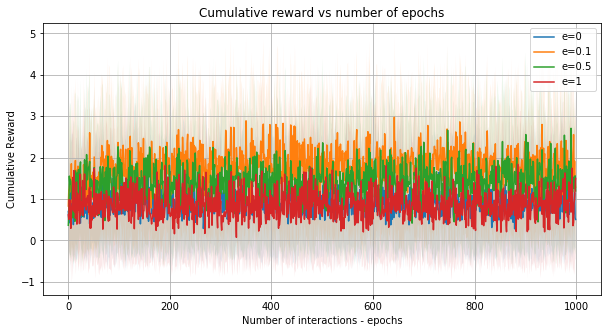

In [79]:
epochs = 1000

gamma = 0.5
alpha = 1
epsilon = [0,0.1,0.5,1]
rep = 20

divQRBF_re(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

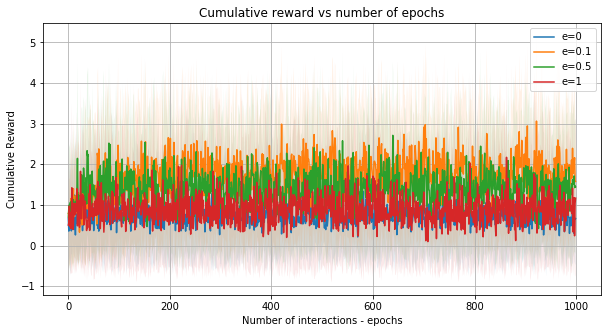

In [80]:
epochs = 1000

gamma = 0.5
alpha = 0.5
epsilon = [0,0.1,0.5,1]
rep = 20

divQRBF_re(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

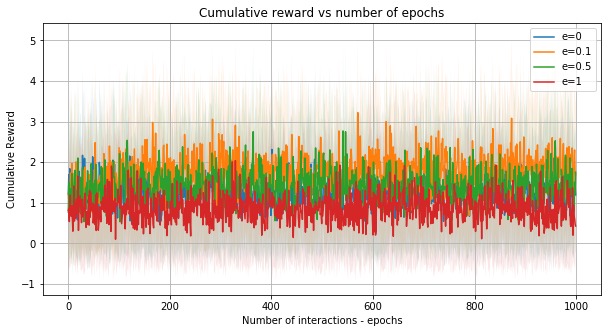

In [81]:
epochs = 1000


gamma = 0.5
alpha = 0.1
epsilon = [0,0.1,0.5,1]
rep = 20

divQRBF_re(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

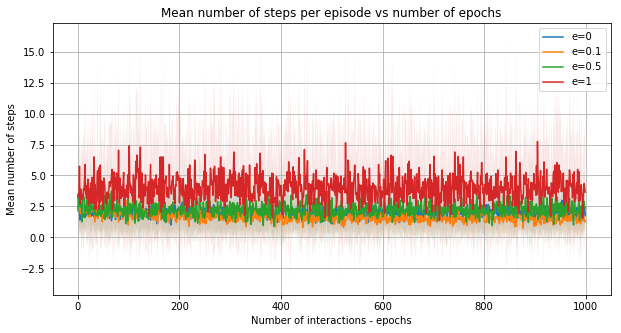

In [82]:
epochs = 1000

gamma = 0.5
alpha = 1
epsilon = [0,0.1,0.5,1]
rep = 20

divQRBF_stepe(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

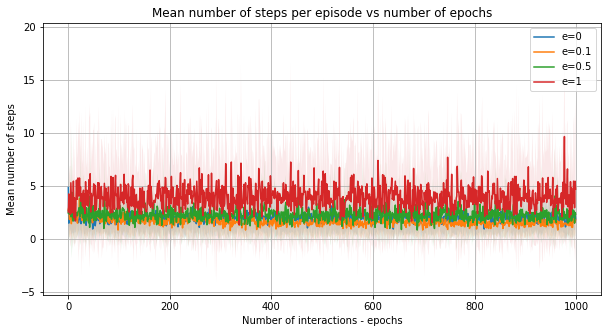

In [83]:
epochs = 1000

gamma = 0.5
alpha = 0.5
epsilon = [0,0.1,0.5,1]
rep = 20

divQRBF_stepe(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

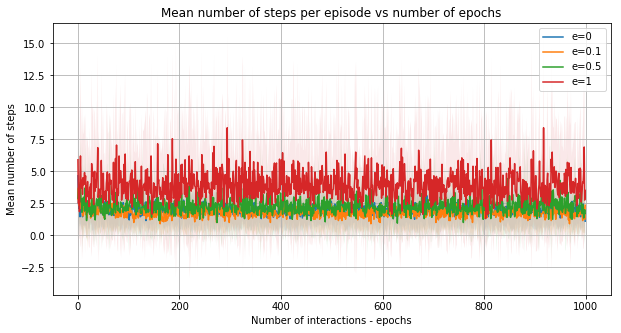

In [84]:
epochs = 1000


gamma = 0.5
alpha = 0.1
epsilon = [0,0.1,0.5,1]
rep = 20

divQRBF_stepe(Q_star, gamma, alpha, epsilon, epochs, rep, mean_g, sigma_g, c_i, sigma)

In [106]:
print(Q_star)
QQQ, _ = Q_learning(gamma, alpha, epsilon, epochs, R, QQ, 0.3)
print(QQQ)

[[0.         1.17647059 0.48442907 0.71239568 1.73010381 0.        ]
 [0.         0.41067516 0.99735396 2.42214533 5.88235294 0.        ]]


In [6]:

epochs = 1000
gamma = 0.5

Q = np.zeros((2,6))
Q_next = np.zeros_like(Q)
R = np.zeros_like(Q)
R[0,1] = 1
R[1,4] = 5
c = 0

for ii in range(epochs):
    c+=1
    for s in range(Q.shape[1]):
        if s==0 or s==5:
                continue
        for a in range(Q.shape[0]):
            Q_next[a,s] = R[a,s] + gamma * max(Q[:, 2*a - 1 + s])
    if np.linalg.norm(Q-Q_next) < 1e-16:
        break
    Q = np.array(Q_next, copy = True)
            
Q = Q_next        
#print(Q)
#print(c)

NameError: name 'np' is not defined

In [147]:
QQ = Q_iteration(gamma, epochs, R, 0.3)
print(QQ)

[[0.     1.     0.725  1.1875 2.375  0.    ]
 [0.     0.7375 1.25   2.5    5.     0.    ]]


## Q-learning

In [56]:
# Implementation of Q-learning
import numpy as np

# Initialize the discount factor gamma, the learning rate alpha, the parameter for ε-greedy epsilon and the number of iterations
# for the Q-learning algorithm epochs
gamma = 0.5
alpha = 0.1
epsilon = 0.1
epochs = 10000 
P = 0

Q = np.zeros((2,6))
Q_next = np.zeros_like(Q)
R = np.zeros_like(Q)
R[0,1] = 1
R[1,4] = 5
n_states = Q.shape[1] - 1
end_state = False


for ii in range(epochs):
    # set an arbitrary initial state. Continue if the initial state is also a terminal state.
    s = np.rint(n_states * np.random.rand()).astype(int)
    if s==0 or s==5:
            continue
    while(not end_state):
        # set current Q function to the value extracted from the previous iteration.
        Q = np.array(Q_next, copy = True)

        # Apply ε-greedy research. The second condition applies for the case of multiple occurences of the max value.
        # Withoout this condition the first occurence would always be returned, meaning that always the agent would take
        # the action left
        t = np.random.rand()
        if t<epsilon or (Q[:,s] == np.amax(Q[:, s]) * np.ones_like(Q[:,s])).all:
            a = np.rint(np.random.rand()).astype(int)
        else:
            a = np.argmax([Q[:,s]])
            
            
        
        # Determine the next state based on action a. Then update the Q function.
        # If we get a reward for ending up in a terminal state set end_state to true and continue with the next epoch
        s_next = 2*a - 1 + s
        Q_next[a,s] = Q[a,s] + alpha * (P * gamma * max(Q[:, s]) + (1-P) * (R[a,s] + gamma * max(Q[:,s_next])) - Q[a,s])
        #Q_next[a,s] = Q[a,s] + alpha/(ii+1) * (R[a,s] + gamma * max(Q[:,s_next]) - Q[a,s])
        if R[a,s]>0:
            end_state = True   
        s = s_next    
    end_state = False
                                       

Q = Q_next    
print(np.round(Q,3))                
                                            

[[0.    1.    0.5   0.625 1.25  0.   ]
 [0.    0.625 1.25  2.5   5.    0.   ]]


## Continuous state - non deterministic transitions

### v1

In [193]:
epochs = 10000
epsilon = 0.1
gamma = 0.5
alpha = 0.1

Q = np.zeros((2,6))
Q_next = np.zeros_like(Q)
cc = np.zeros_like(Q)
R = np.zeros_like(Q)
R[0,1] = 1
R[1,4] = 5
n_states = Q.shape[1] - 1
end_state = False

sigma = 0.1

# initial weights for the function approximation
w = np.random.rand(13)

# parameters of the Gaussian for the noise corruption of state transition. Mean and std
mean_g = 0
sigma_g = 0.1

Loss = 0

# basis functions in form (action x state x basis functions)
phi_sa = np.zeros((2,6,13))
phi_sa[:,:,12] = 1

phi_s = np.abs(np.arange(6) - np.arange(6)[:,np.newaxis])
phi_sa[0, :, 0:6] = phi_s
phi_sa[1, :, 6:12] = phi_s

for ii in range(epochs):
    # set an arbitrary initial state. Continue if the initial state is also a terminal state.
    s = np.rint(n_states * np.random.rand()).astype(int)
    s_disc = s
    if s==0 or s==5:
            continue
    while(not end_state):
    #for i in range(1):        
        # Apply ε-greedy research to determine the next action
        t = np.random.rand()
        if t<epsilon:
            a = np.rint(np.random.rand()).astype(int)
        else:
            a = np.argmax([Q[:,s_disc]])
            
        # derive next continuous state, incorporating the Gaussian noise
        # extract also a discretised next state. each state corresponds to the interval s+-0.5
        s_next = 2*a - 1 + s + np.random.normal(mean_g, sigma_g)
        s_next_disc = np.rint(s_next).astype(int)
        if s_next_disc<0:
            s_next_disc = 0
        elif s_next_disc>Q.shape[1] - 1:
            s_next_disc = Q.shape[1] - 1
        
        # Incrementing the counter of interactions with the certain (action, state) for a discretized version of the next state
        # Next update the Q_target approximation, by division with the counter of (action, state)
        cc[a, s_disc] += 1
        Q_next[a, s_disc] = (R[a,s_disc] + gamma * max(Q[:, s_next_disc])) / cc[a, s_disc]
        div = Q_next[a, s_disc] - np.multiply(w, phi_sa[a, s_disc, :])
        Loss += 0.5 * div**2
        w += alpha * np.multiply(div , phi_sa[a, s_disc, :])
        
        if s_next<0.5 or s_next>=4.5:
            end_state = True
            
        s = s_next
        s_disc = s_next_disc
        Qtemp = np.array(Q, copy = True)
        Q = np.array(Q_next, copy = True)
    end_state = False
    if ii%100 == 0 :
        print('Loss', np.linalg.norm(Loss))
        #print('Divergence', np.linalg.norm(Q-Qtemp))

Loss 5.578089670481885
Divergence 0.00017088174982911666
Loss 77.20980680252865
Divergence 0.027472527472527486
Loss 79.34752487483807
Divergence 0.0006105006105006083
Loss 79.53295820328552
Divergence 0.00017403411068569324
Loss 79.56690331735255
Divergence 8.779168788299301e-06
Loss 79.60089990869498
Divergence 8.228827227543464e-05
Loss 79.6488154922247
Divergence 3.867394768188471e-06
Loss 79.6594318989987
Divergence 3.132832080200362e-05
Loss 79.66711539232838
Divergence 2.636296530633686e-05
Loss 79.67423915477988
Divergence 2.4683313093016527e-06
Loss 79.68072030805389
Divergence 1.8526752630797574e-05
Loss 79.68519918792036
Divergence 1.953353908661125e-06
Loss 79.68920344527331
Divergence 1.7290269036585645e-06
Loss 79.6939054773825
Divergence 1.5922147069689137e-06
Loss 79.69885992225026
Divergence 1.0366346692098141e-05
Loss 79.704630697613
Divergence 1.2062580668507818e-06
Loss 79.70680307192997
Divergence 7.536817352767761e-06
Loss 79.71265091915642
Divergence 5.7377481862

### v2

In [9]:
def RBF_kernels(c_i, sigma, s, num_actions):
    
    ff = 1e-8
    l=len(c_i)
    
    phi_as = np.zeros((num_actions, l*2 + 1))
    phi_as[:,l*2] = 1    
    phi_s = np.exp(-np.power(c_i - s,2) / (2*(sigma + ff )**2))
    for i in range(num_actions):
        phi_as[i, i*l:(i+1)*l] = phi_s
    
    return phi_as

def RBF_kernels_norm(c_i, sigma, s, num_actions):
    ff = 1e-8
    l=len(c_i)
    
    phi_as = np.zeros((num_actions, l*2 + 1))
    phi_as[:,l*2] = 1    
    phi_s = np.exp(-np.power(c_i - s, 2) / (2*(sigma + ff)**2)) 
    phi_s = phi_s / (np.sum(phi_s) + ff)
    for i in range(num_actions):
        phi_as[i, i*l:(i+1)*l] = phi_s
    
    return phi_as

def RBF_kernelsv2(c_i, sigma, s, num_actions):
    
    ff = 1e-8
    l=len(c_i)
    
    # basis functions: number of kernels used x number of actions + number of actions bias term
    phi_as = np.zeros((num_actions, l*num_actions + num_actions))
    phi_s = np.ones((l+1))
    phi_s[0:l] = np.exp(-np.power(c_i - s, 2) / (2*sigma**2 + ff))
    for i in range(num_actions):
        phi_as[i, i*(l+1):(i+1)*(l+1)] = phi_s    
        
    return phi_as

def RBF_kernelsv2_norm(c_i, sigma, s, num_actions):
    
    ff = 1e-8
    l=len(c_i)
    
    # basis functions: number of kernels used x number of actions + number of actions bias term
    phi_as = np.zeros((num_actions, l*num_actions + num_actions))
    phi_s = np.ones((l+1))
    phi_s[0:l] = np.exp(-np.power(c_i - s, 2) / (2*sigma**2 + ff))
    phi_s = phi_s / (np.sum(phi_s) + ff)
    for i in range(num_actions):
        phi_as[i, i*(l+1):(i+1)*(l+1)] = phi_s    
        
    return phi_as

def RBF_kernels_nobias(c_i, sigma, s, num_actions):
    
    ff = 1e-8
    l=len(c_i)
    
    # basis functions: number of kernels used x number of actions + number of actions bias term
    phi_as = np.zeros((num_actions, l*num_actions))
    phi_s = np.exp(-np.power(c_i - s, 2) / (2*sigma**2 + ff))
    #phi_s = phi_s / (np.sum(phi_s) + ff)
    for i in range(num_actions):
        phi_as[i, i*l:(i+1)*l] = phi_s    
        
    return phi_as

def RBF_kernels_nobias_norm(c_i, sigma, s, num_actions):
    
    ff = 1e-8
    l=len(c_i)
    
    # basis functions: number of kernels used x number of actions + number of actions bias term
    phi_as = np.zeros((num_actions, l*num_actions))
    phi_s = np.exp(-np.power(c_i - s, 2) / (2*sigma**2 + ff))
    phi_s = phi_s / (np.sum(phi_s) + ff)
    for i in range(num_actions):
        phi_as[i, i*l:(i+1)*l] = phi_s    
        
    return phi_as

In [181]:
c_i = np.arange(6)
#pp =RBF_kernels_nobias(c_i, 0, 2, 2)
p = RBF_kernels_nobias_norm(c_i, 0, 2, 2)
#print(pp)
print(p)

[[0.         0.         0.99999999 0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.99999999 0.         0.         0.        ]]


In [53]:
# Hyperparameters of Q-learning. Number of epochs-iter, epsilon parameter for e-greedy search, discount factor gamma
# and learning rate alpha for the GD
epochs = 5000
epsilon = 0.5
gamma = 0.5
alpha = 0.01
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])

# initialization of algorithm parameters. weights for the function approximation.
r = 0
n_states = 5
end_state = False
n_actions = 2
mean_R = np.zeros(epochs)
std_R = np.zeros(epochs)
steps = np.zeros(epochs)
c=0

# parameters of the Gaussian for the noise corruption of state transition. Mean and std
mean_g = 0
sigma_g = 0.1

# statistics
Loss = 0
acc_Reward = 0
Loss_opt = np.zeros(epochs)

# Parameters of the utilized basis functions. Width sigma and c_i is the vector with the centers of the RBF kernels
sigma = 0.1
c_i = np.arange(0,6,1)
#c_i = np.array([1,3,5])
theta = np.zeros(len(c_i)* n_actions)   # 13: number of kernels x number of actions + 1 bias term

# For each epoch pick an initial state. If the initial state is a terminal one move to the next epoch
for ii in range(epochs):
    # set an arbitrary initial state. Continue if the initial state is also a terminal state.
    #alpha = 1/(ii+1)
    s = np.rint(n_states * np.random.rand()).astype(int)
    if s==0 or s==5:
            #Loss_opt[ii] = Loss_opt[ii-1]
            
            continue

    RR = []
    # As long as the agent does not reach a terminal state repeat
    while(not end_state):
            
        # Extract the values for the basis functions based on the given state and compute the approximation for Q
        phi_as = RBF_kernels_nobias_norm(c_i, sigma, s, n_actions)
        Q = np.matmul(phi_as, theta)
        
        # Apply ε-greedy research to determine the next action
        t = np.random.rand()
        if t<epsilon or (Q == (np.amax(Q) * np.ones_like(Q))).all():
            a = np.rint(np.random.rand()).astype(int) 
        else:
            a = np.argmax(np.matmul(phi_as, theta))
            
        
        # derive next continuous state, incorporating the Gaussian noise
        # extract the values of the basis fucntions for the calculated next state
        s_next = 2*a - 1 + s + np.random.normal(mean_g, sigma_g)
        phi_as_next = RBF_kernels_nobias_norm(c_i, sigma, s_next, n_actions)
        
        # Check whether the agent reaches a terminal state
        if s_next <0.5 or s_next >= 4.5:
            end_state = True
            if s_next < 0.5:
                r = 1
            else:
                r = 5
            Q_next = r
        else:
            Q_next = r + gamma * np.amax(np.matmul(phi_as_next, theta))
            
        RR.append(gamma**ii * r)        
                
        # calculate one step TD, update the Loss and update the weights
        div = Q_next - Q[a]
        Loss += 0.5*div**2
        temp = np.array(theta, copy = True)
        theta += alpha * div * phi_as[a, :]
        c+=1
        s = s_next
        
    steps[ii] = c
    c=0
    end_state = False
    Loss_opt[ii] = getLoss(Q_star, theta, c_i, sigma)
    mean_R[ii] = np.mean(np.array(RR, copy = True))
    std_R[ii] = np.std(np.array(RR, copy = True))
    r = 0
    if ii%1000 == 0 :
        #alpha = alpha/10
        #epsilon = epsilon/10
        print(ii)
        print('w', np.linalg.norm(temp-theta))
        print('loss', Loss)
        
        

0
w 0.04999999950000001
loss 12.5
1000
w 0.00018207846698103936
loss 814.761986281447
2000
w 5.307420829225862e-05
loss 855.7379627305102
3000
w 3.149470614305372e-07
loss 874.366768090816
4000
w 4.3329150122950466e-05
loss 894.5678833599484


In [10]:
def getLoss(Q_star, theta, c_i, sigma):

    Q = np.zeros((2,6))
    for s in range(6):
        phi = RBF_kernels_nobias_norm(c_i, sigma, s, 2)
        for a in range(2):
            Q[a,s]= np.matmul(phi[a, :], theta)     
    Loss = np.linalg.norm(Q-Q_star)
    #print(Q)
    return Loss
    
    
    #print(np.sqrt(np.sum(np.power(Q-Q_star, 2))))
    #print(np.linalg.norm(Q-Q_star))

#print(np.linalg.norm(0))    
 

def Q_learning_RBF(epochs, alpha, gamma, epsilon, Q_star, mean_g, sigma_g, c_i, sigma):
# This function implements Q-learning with value function approximation, using RBF kernels as basis functions. The input 
# parameters used are the number of iterations to run epochs, the learning rate for the weights update, the discound factor 
# gamma, the parameter for e-greedy policy epsilon, the optimal Q Q_star, the mean and the std for the Gaussian noise mean_g 
# sigma_g respectively, the centers of the RBFs c_i and their widths sigma

    # initialization of algorithm parameters. weights for the function approximation.
    r = 0
    n_states = Q_star.shape[1]-1
    end_state = False
    n_actions = Q_star.shape[0]
    mean_R = np.zeros(epochs)
    std_R = np.zeros(epochs)

    # statistics
    Loss = 0
    #Loss_opt = np.zeros(epochs)
    #std_Loss_opt = np.zeros_like(Loss_opt)
    steps = np.zeros(epochs)
    c=0

    # Initialization of the weights, for the value function approximation
    theta = np.zeros(len(c_i)* n_actions)   # 13: number of kernels x number of actions + 1 bias term

    # For each epoch pick an initial state. If the initial state is a terminal one move to the next epoch
    for ii in range(epochs):
        # set an arbitrary initial state. Continue if the initial state is also a terminal state.
        s = np.rint(n_states * np.random.rand()).astype(int)
        if s==0 or s==5:
                #Loss_opt[ii] = Loss_opt[ii-1]
                continue

        #RR = []
        #LL = []
        # As long as the agent does not reach a terminal state repeat
        while(not end_state):

            # Extract the values for the basis functions based on the given state and compute the approximation for Q
            phi_as = RBF_kernels_nobias_norm(c_i, sigma, s, n_actions)
            Q = np.matmul(phi_as, theta)

            # Apply ε-greedy research to determine the next action
            t = np.random.rand()
            if t<epsilon or (Q == (np.amax(Q) * np.ones_like(Q))).all():
                a = np.rint(np.random.rand()).astype(int) 
            else:
                a = np.argmax(np.matmul(phi_as, theta))


            # derive next continuous state, incorporating the Gaussian noise
            # extract the values of the basis functions for the calculated next state
            s_next = 2*a - 1 + s + np.random.normal(mean_g, sigma_g)
            phi_as_next = RBF_kernels_nobias_norm(c_i, sigma, s_next, n_actions)

            # Check whether the agent reaches a terminal state
            # extract the approximation for the next Q 
            if s_next <0.5 or s_next >= 4.5:
                end_state = True
                if s_next < 0.5:
                    r = 1
                else:
                    r = 5
                Q_next = r
            else:
                Q_next = r + gamma * np.amax(np.matmul(phi_as_next, theta))
            
            mean_R[ii] += r * gamma**c
            #RR.append(gamma**c * r)
            #LL.append(getLoss(Q_star, theta, c_i, sigma))

            # calculate one step TD, update the Loss and update the weights
            div = Q_next - Q[a]
            Loss += 0.5*div**2
            temp = np.array(theta, copy = True)
            theta += alpha * div * phi_as[a, :]
            c+=1
            s = s_next
        #LL.append(getLoss(Q_star, theta, c_i, sigma))

        steps[ii]=c
        c=0
        end_state = False
        #Loss_opt[ii] = np.mean(np.array(LL, copy = True))
        #std_Loss_opt[ii] = np.std(np.array(LL, copy = True))
        #mean_R[ii] = np.sum(np.array(RR, copy = True))
        #std_R[ii] = np.std(np.array(RR, copy = True))
        r = 0
        
    return theta, steps, mean_R


In [12]:
gamma = 0.5
alpha = 1
epsilon = 0
rep = 20
mean_g=0
sigma_g=0.7

sigma = 0.1
c_i = np.arange(6)

Q_star = Q_iteration(gamma, epochs, R)
_, m, s = Q_learning_RBF(epochs, alpha, gamma, epsilon, Q_star, mean_g, sigma_g, c_i, sigma)

In [14]:
print(s)

[6.25000000e-01 6.25000000e-01 0.00000000e+00 2.50000000e+00
 5.00000000e+00 6.25000000e-01 5.00000000e+00 5.00000000e+00
 0.00000000e+00 5.00000000e+00 2.50000000e+00 5.00000000e+00
 2.50000000e+00 3.12500000e-01 1.25000000e+00 1.25000000e+00
 5.00000000e+00 6.25000000e-01 5.00000000e+00 0.00000000e+00
 6.25000000e-01 5.00000000e+00 5.00000000e+00 5.00000000e+00
 0.00000000e+00 0.00000000e+00 1.25000000e+00 5.00000000e+00
 0.00000000e+00 0.00000000e+00 5.00000000e+00 6.25000000e-01
 6.25000000e-01 2.50000000e+00 5.00000000e+00 2.50000000e+00
 2.50000000e+00 5.00000000e+00 2.50000000e+00 5.00000000e+00
 3.12500000e-01 1.25000000e+00 6.25000000e-01 0.00000000e+00
 1.25000000e+00 5.00000000e+00 5.00000000e+00 6.25000000e-01
 1.25000000e+00 0.00000000e+00 5.00000000e+00 6.25000000e-01
 5.00000000e+00 3.12500000e-01 5.00000000e+00 0.00000000e+00
 0.00000000e+00 5.00000000e+00 0.00000000e+00 5.00000000e+00
 3.12500000e-01 2.50000000e+00 5.00000000e+00 5.00000000e+00
 5.00000000e+00 2.500000

[8.43626002e-03 0.00000000e+00 1.92695685e-02 ... 0.00000000e+00
 1.54431219e-06 0.00000000e+00]


<function matplotlib.pyplot.fill>

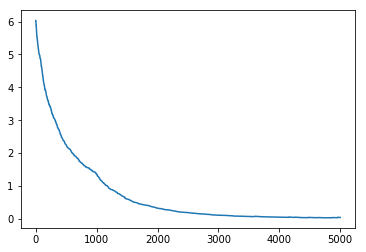

In [285]:
aa=np.arange(epochs)
print(s)
plt.figure()

plt.fill_between(aa, m - s,
                             m + s, alpha=0.1)
plt.plot(aa, m)
plt.fill

## Sarsa

In [87]:
# The implementation of SARSA algorithm. The input parameters are the discount factor gamma, the learning rate alpha, the 
# parameter epsilon of greedy research, the number of iterations epochs and the reward matrix R. P corresponds to the 
# probability of having a broken robot, thus staying to the same state with probability P.
def SARSA(gamma, alpha, epsilon, epochs, R, Q_star, P = None):
    
    Q_check = np.zeros(epochs)
    std_Q_check = np.zeros_like(Q_check)
    
    if P == None:
        P = 0
    Q = np.zeros_like(R)
    
    n_states = Q.shape[1] - 1
    end_state = False
    
    # iterate for the set number of epochs
    for ii in range(epochs):
        # set an arbitrary initial state. Continue if the initial state is also a terminal state.
        LL = []
        s = np.rint(n_states * np.random.rand()).astype(int)
        if s==0 or s==5:
            Q_check[ii] = Q_check[ii-1] 
            continue
                
        # Apply ε-greedy research. The second condition applies for the case of multiple occurences of the max value.
        # Withoout this condition the first occurence would always be returned, meaning that always the agent would take
        # the action left
        t = np.random.rand()
        if t<epsilon or (Q[:,s] == np.amax(Q[:, s]) * np.ones_like(Q[:,s])).all():
            a = np.rint(np.random.rand()).astype(int)
        else:
            a = np.argmax([Q[:,s]])
        
           
        # each episode include a number of steps updating the Q-function until the agent reaches a terminal state, when the
        # running episode ends and we move to the next iteration
        while(not end_state):
            # set current Q function to the value extracted from the previous iteration.
            #Q = np.array(Q_next, copy = True)
            
            s_next = 2*a - 1 + s 
            # Determine the next state based on action a. Then update the Q function.
            # If we get a reward for ending up in a terminal state set end_state to true and continue with the next epoch
            LL.append(np.linalg.norm(Q- Q_star))
            t = np.random.rand()
            if t<epsilon or (Q[:,s_next] == np.amax(Q[:, s_next]) * np.ones_like(Q[:,s_next])).all():
                a_next = np.rint(np.random.rand()).astype(int)
            else:
                a_next = np.argmax(Q[:,s_next])
            
            delta = R[a,s] + gamma * ((1-P)*Q[a_next, s_next] + P*Q[a_next, s]) - Q[a,s]
            Q[a,s] = Q[a,s] + alpha * delta
            #Q_next[a,s] = Q[a,s] + alpha/(ii+1) * (R[a,s] + gamma * max(Q[:,s_next]) - Q[a,s])
            if R[a,s]>0:
                end_state = True   
            s = s_next
            a = a_next
        LL.append(np.linalg.norm(Q-Q_star))
        Q_check[ii] = np.mean(np.array(LL, copy=True))
        std_Q_check[ii] = np.std(np.array(LL, copy=True))
        end_state = False
       
    
    return Q, Q_check, std_Q_check

In [71]:
epochs = 2000
alpha = 0.1
epsilon = 0.2
gamma=0.5

Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
R = np.zeros((2,6))
R[0,1] = 1
R[1,4] = 5

QQ, L,_ = SARSA(gamma, alpha, epsilon, epochs, R, Q_star)
print(QQ)

[[0.         1.         0.49553124 0.44279748 1.11623145 0.        ]
 [0.         0.51027771 1.13980815 2.35650838 5.         0.        ]]


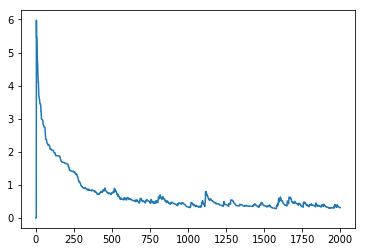

In [72]:
plt.figure()
plt.plot(np.arange(epochs), L)

### Continuous environment - stochastic transition

In [244]:
# Hyperparameters of Q-learning. Number of epochs-iter, epsilon parameter for e-greedy searck, discount factor gamma
# and learning rate alpha for the GD
epochs = 10000
epsilon = 0.3
gamma = 0.5
alpha = 1
lamda = 0.5


# initialization of algorithm parameters. weights for the function approximation.
r = 0
n_states = 5
end_state = False

# parameters of the Gaussian for the noise corruption of state transition. Mean and std
mean_g = 0
sigma_g = 0.1

# statistics
Loss = 0
acc_Reward = 0

# Parameters of the utilized basis functions. Width sigma and c_i is the vector with the centers of the RBF kernels
theta = np.random.rand(13)   # 13: number of kernels x number of actions + 1 bias term
sigma = 0.1
c_i = np.arange(0,6)
#c_i = np.array([1,4])

for ii in range(epochs):
    # set an arbitrary initial state. Continue if the initial state is also a terminal state.
    e = np.zeros_like(theta)
    s = np.rint(n_states * np.random.rand()).astype(int)
    if s==0 or s==5:
            continue
    # Apply ε-greedy research to determine the next action
    t = np.random.rand()
    if t<epsilon:
        a = np.rint(np.random.rand()).astype(int)
    else:
        phi_as = RBF_kernels_norm(c_i, sigma, s, 2)
        a = np.argmax(np.matmul(phi_as, theta))
            
    while(not end_state):
    #for i in range(1):        
            
            
        # derive next continuous state, incorporating the Gaussian noise
        # extract also a discretised next state. each state corresponds to the interval s+-0.5
        #print(e)
        e[a*len(c_i) : (a+1)*len(c_i)] += 1
        e[12] += 1
        #print(e)
        Q = np.matmul(phi_as, theta)
        s_next = 2*a - 1 + s + np.random.normal(mean_g, sigma_g)
        
        
        # Incrementing the counter of interactions with the certain (action, state) for a discretized version of the next state
        # Next update the Q_target approximation, by division with the counter of (action, state)
        #cc[a, s_disc] += 1
        if s_next <0.5 or s_next>=4.5:
            end_state = True
            if s_next < 0.5:
                r = 1
            else:
                r = 5
                
        #delta = r - np.sum(theta[a*len(c_i) : (a+1)*len(c_i)]) - theta[12]      
        delta = r - Q[a]
        
        phi_as_next = RBF_kernels_norm(c_i, sigma, s_next, 2)
        
        # Apply ε-greedy research to determine the next action
        t = np.random.rand()
        if t<epsilon:
            a_next = np.rint(np.random.rand()).astype(int)
        else:
            a_next = np.argmax(np.matmul(phi_as_next, theta))
        
        Q = np.matmul(phi_as_next[a_next, :], theta)
        #Q = np.sum(theta[a_next*len(c_i) : (a_next+1)*len(c_i)]) + theta[12]
        
        delta += gamma*Q
        temp = np.array(theta, copy = True)
        theta += alpha*delta*e
        e = gamma*lamda*e
        
        acc_Reward += r

        
        
        #print(temp,theta)
            
        s = s_next
        a = a_next
        
    end_state = False
    r = 0
    if ii%100 == 0 :
        print('Loss', np.linalg.norm(temp-theta))
        

Loss 2.629800574619949
Loss 3.084924691197245
Loss 3.020249003610918
Loss 3.015510833905695
Loss 2.189559697124437
Loss 14.635270057025723
Loss 2.7227522305405
Loss 3.1560531838082597
Loss 1.6449228098796498
Loss 21.086097173499027
Loss 18.993810983880458
Loss 2.722752196789655
Loss 5.56643482846212
Loss 2.643635955619678
Loss 2.722752204601785
Loss 2.472129950901459
Loss 19.229140450207648
Loss 14.592858924371356
Loss 14.66576307224549
Loss 2.72275221760027
Loss 2.6745676262971427
Loss 4.23966431696853
Loss 2.633525065938703
Loss 18.720184081613784
Loss 3.0301284553637378
Loss 3.0259456492283805
Loss 19.1709365929159
Loss 1.0156972095281314
Loss 1.6235263757844374
Loss 18.723489274381997
Loss 14.899523302142688
Loss 4.249900535873358
Loss 18.723489376134086
Loss 17.758946915287364
Loss 18.723489377403084
Loss 18.909508137328984
Loss 2.643635956721508
Loss 17.722592831649525
Loss 1.8565741793397805
Loss 2.6436359476607048
Loss 2.1895567112968677
Loss 0.6119959432685494
Loss 2.611569490

### L2 diff vs epochs - fixed epsilon

[[0.    1.    0.5   0.625 1.25  0.   ]
 [0.    0.625 1.25  2.5   5.    0.   ]]


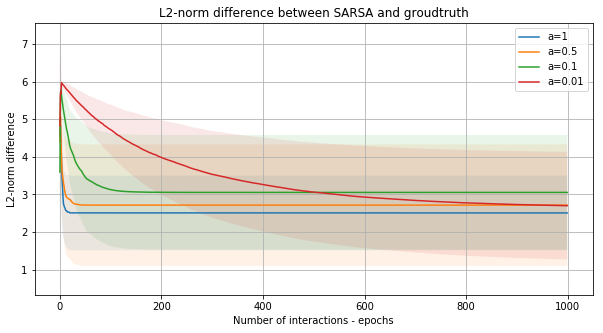

In [88]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
print(Q_star)

Q = np.zeros((2,6))
R = np.zeros_like(Q)
R[0,1] = 1
R[1,4] = 5


gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0
rep = 20

SARSA_alpha(Q_star, gamma, alpha, epsilon, epochs, rep, R, 0)

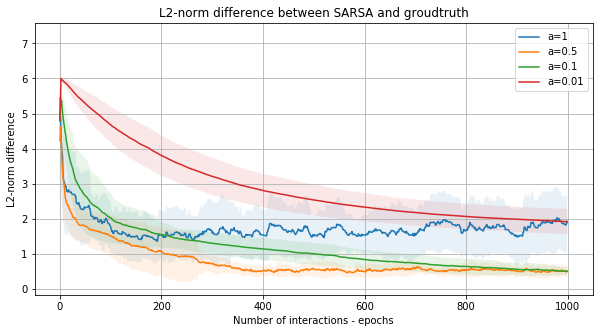

In [89]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.1
rep = 20

SARSA_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

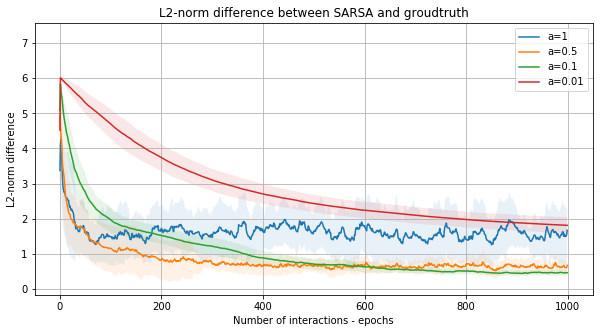

In [90]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.2
rep = 20

SARSA_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

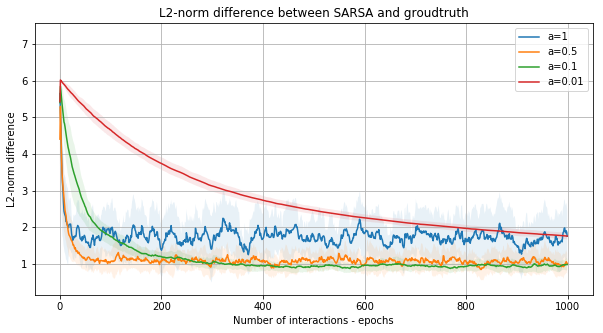

In [91]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.5
rep = 20

SARSA_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

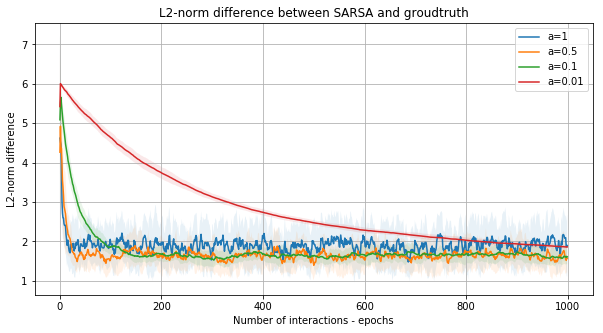

In [92]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.9
rep = 20

SARSA_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

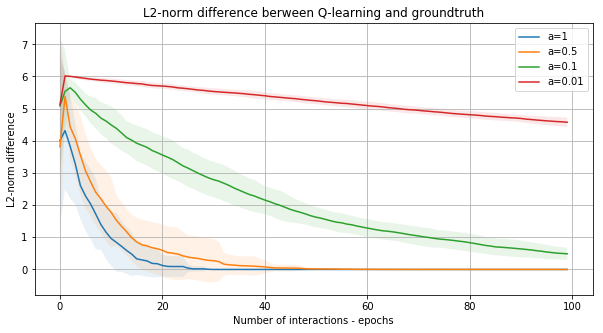

In [75]:
epochs = 100
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 0.9
rep = 20

SARSA_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

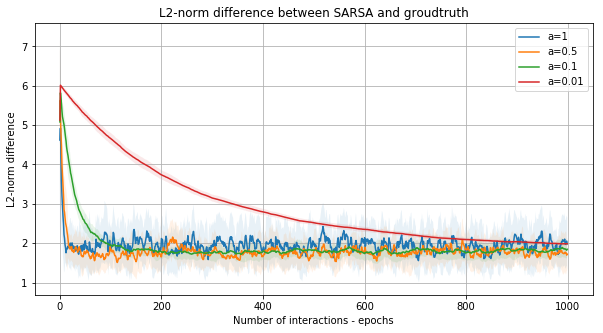

In [93]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 1
rep = 20

SARSA_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

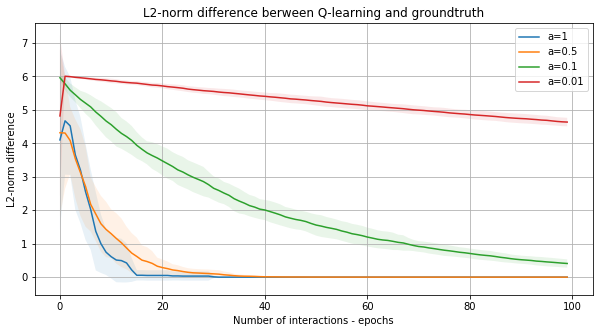

In [77]:
epochs = 100
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = [1, 0.5, 0.1, 0.01]
epsilon = 1
rep = 20

SARSA_alpha(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

### L2 diff vs epochs - fixed alpha

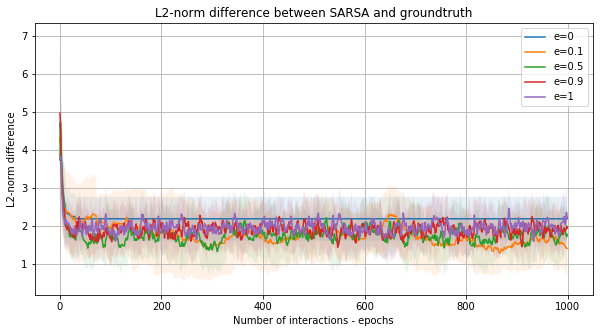

In [94]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 1
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

SARSA_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

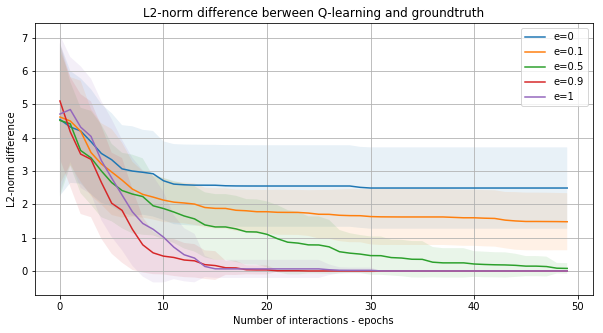

In [91]:
epochs = 50
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 1
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

SARSA_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

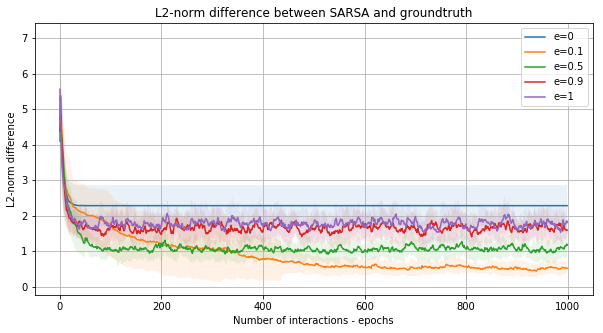

In [95]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 0.5
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

SARSA_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

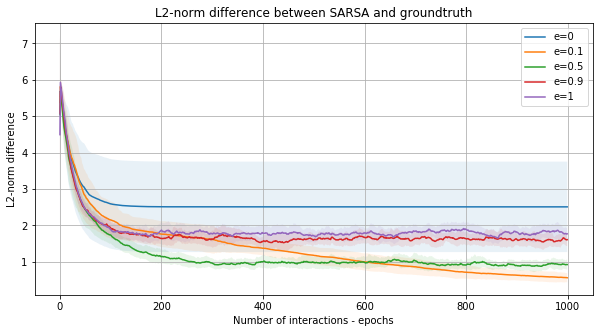

In [96]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 0.1
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

SARSA_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)

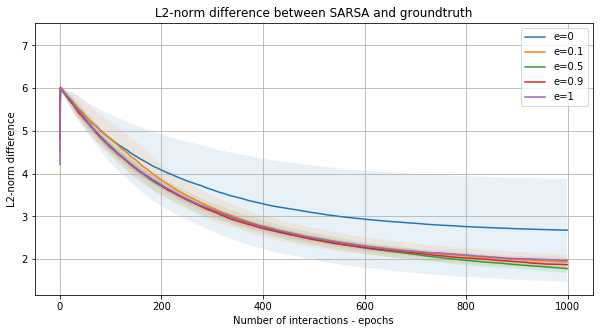

In [97]:
epochs = 1000
Q_star = np.array([[0.0, 1.0, 0.5, 0.625, 1.25, 0.0], [0.0, 0.625, 1.25, 2.5, 5.0, 0.0]])
#print(Q_star)

gamma = 0.5
alpha = 0.01
epsilon = [0,0.1,0.5,0.9,1]
rep = 20

SARSA_epsilon(Q_star, 0.5, alpha, epsilon, epochs, rep, R, 0)